# Bike Sharing Demand

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [4]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## Data Fields
**datetime** - hourly date + timestamp   

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter    

**holiday** - whether the day is considered a holiday   

**workingday** - whether the day is neither a weekend nor holiday   

**weather** -   
1: Clear, Few clouds, Partly cloudy, Partly cloudy   
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

**temp** - temperature in Celsius   

**atemp** - "feels like" temperature in Celsius   

**humidity** - relative humidity   

**windspeed** - wind speed   

**casual** - number of non-registered user rentals initiated   

**registered** - number of registered user rentals initiated   

**count** - number of total rentals

## 데이터 불러오고 컬럼 확인

In [5]:
test = pd.read_csv("test.csv", parse_dates = ["datetime"])
train = pd.read_csv("train.csv", parse_dates = ["datetime"])

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 결측치 확인

null 값이 있는지 확인한다.

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

하나도 없다.

## datatime 분석

season을 보니 1~3월이 봄으로 되어있다. 겨울 아닌가?   
season별로 데이터를 분석하는것이 의미가 없을 것 같아 datetime을 쪼개주었다.   

참고 : https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603462366&proxyReferer=https:%2F%2Fwww.google.com%2F

In [9]:
train["year"] = train["datetime"].dt.year 
train["month"] = train["datetime"].dt.month 
train["day"] = train["datetime"].dt.day 
train["hour"] = train["datetime"].dt.hour 

test["year"] = test["datetime"].dt.year 
test["month"] = test["datetime"].dt.month 
test["day"] = test["datetime"].dt.day 
test["hour"] = test["datetime"].dt.hour 

In [10]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


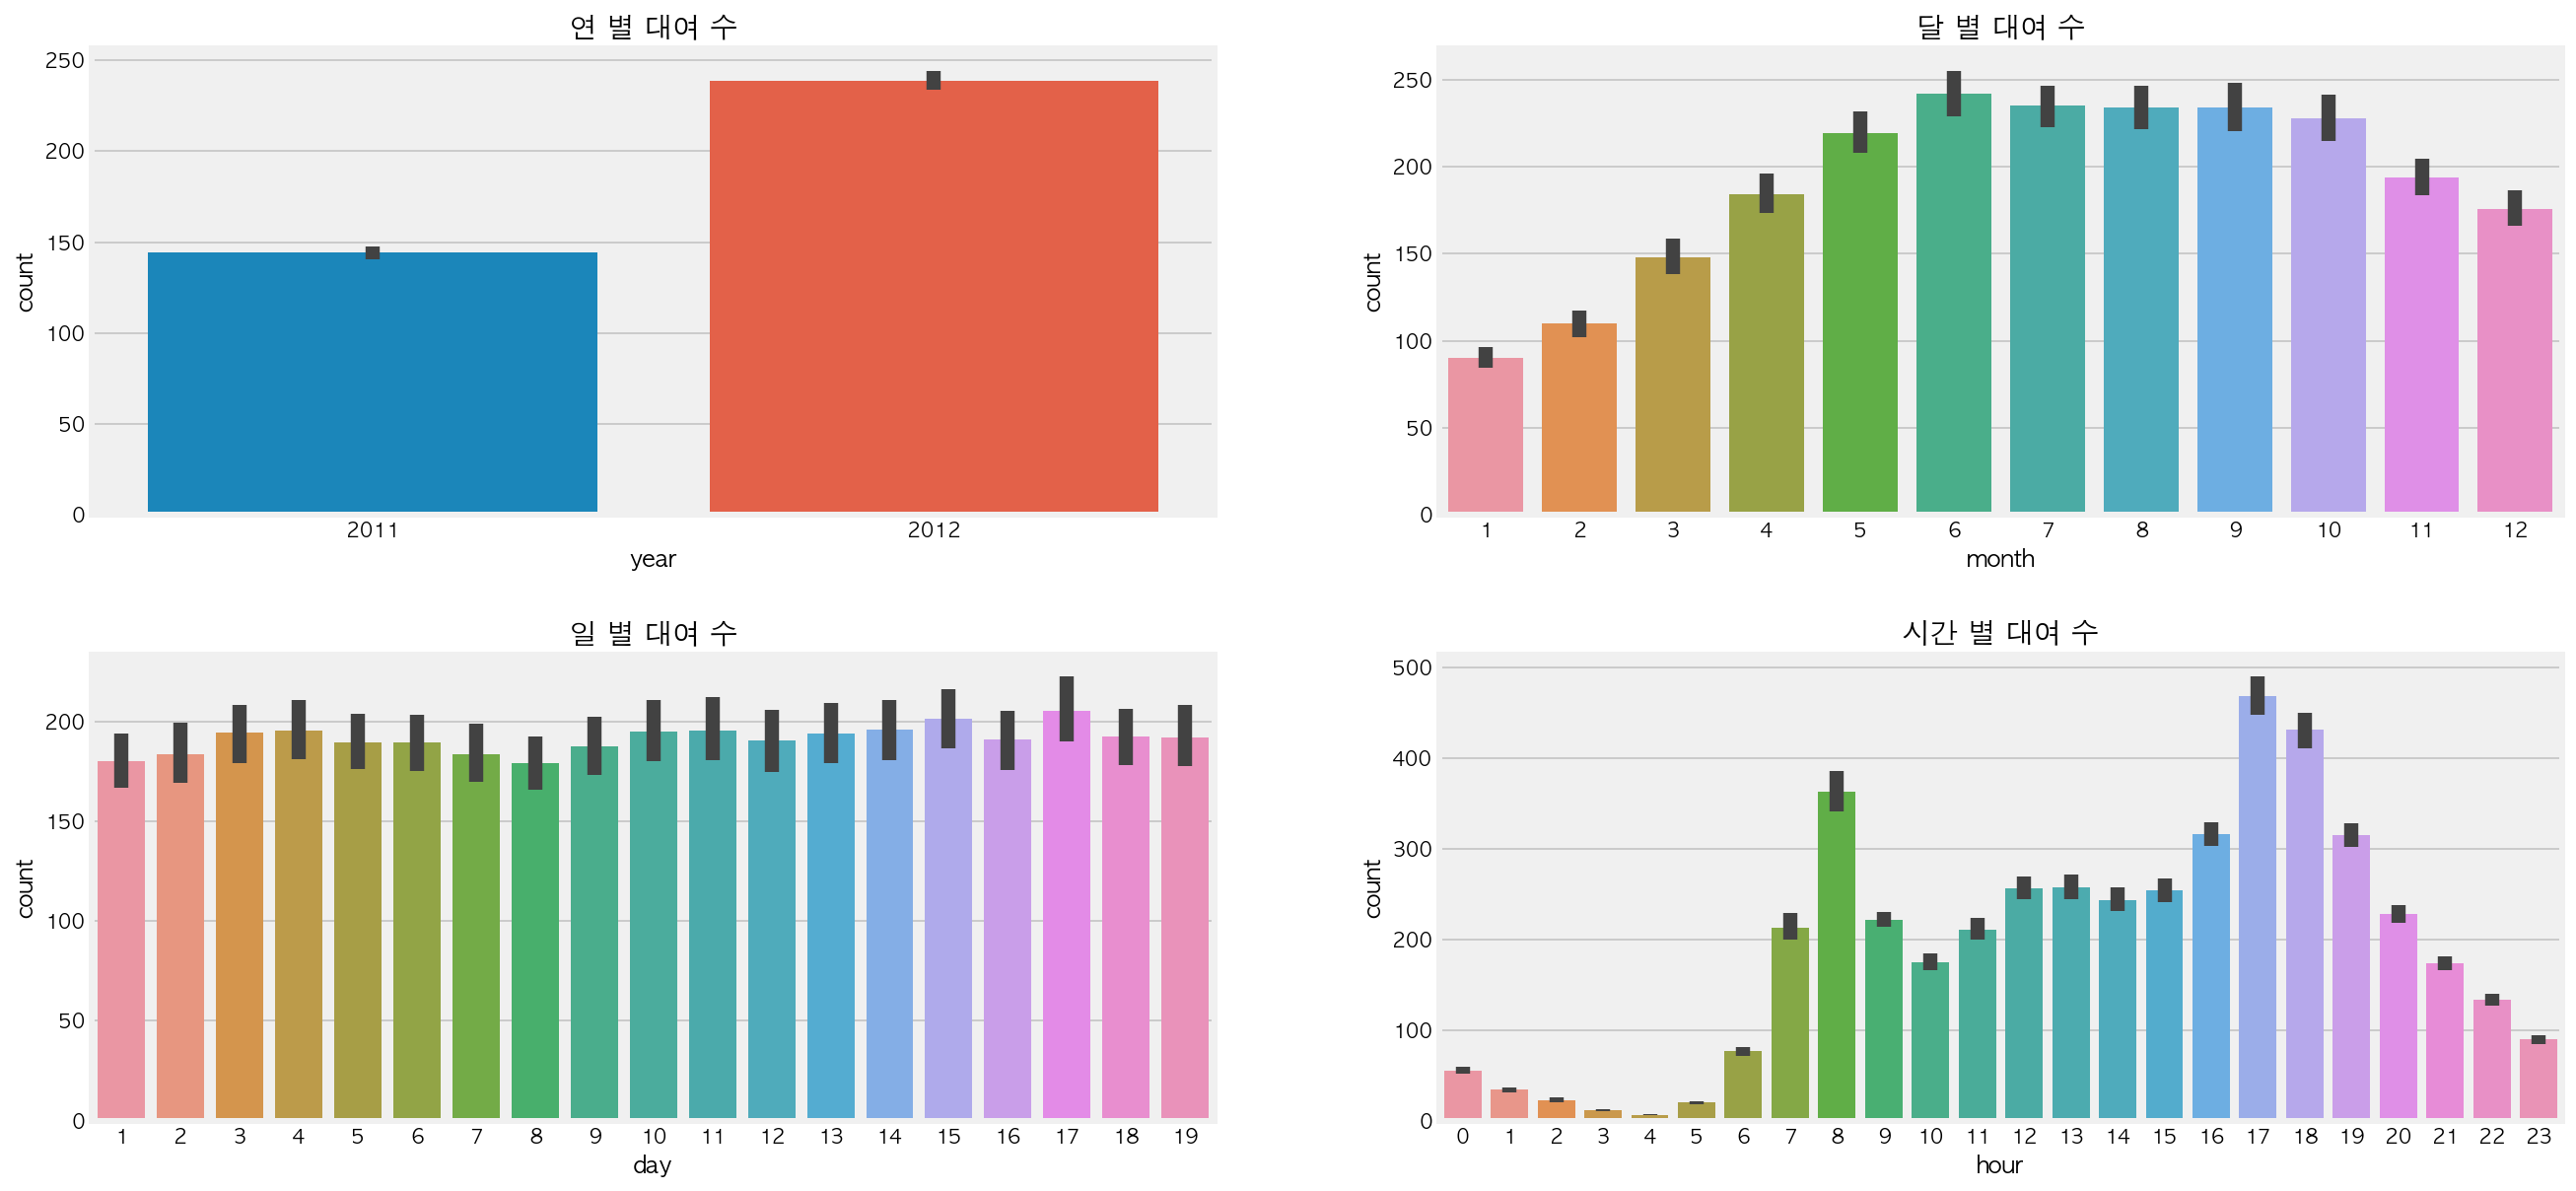

In [11]:
f, ax = plt.subplots(2,2, figsize=(20,10))

sns.barplot("year","count", data=train, ax = ax[0,0]) 
sns.barplot("month","count", data=train, ax = ax[0,1]) 
sns.barplot("day","count", data=train, ax = ax[1,0]) 
sns.barplot("hour","count", data=train, ax = ax[1,1]) 


ax[0,0].set_title('연 별 대여 수')
ax[0,1].set_title('달 별 대여 수')
ax[1,0].set_title('일 별 대여 수')
ax[1,1].set_title('시간 별 대여 수')

plt.subplots_adjust(wspace=0.2,hspace=0.3)

년, 월, 일, 시간 각각 대여량을 살펴보니 역시 날씨가 좋은 5\~10월에 대여율이 가장 높고,   
아침 8시랑 저녁 5\~7시 사이가 높은 것을 확인할 수 있다.   
딱 아침이랑 저녁 사람들의 유동인구가 많을 출퇴근 시간이다.   
그럼, 요일에 따라 대여량이 다를까?

<AxesSubplot:xlabel='weekday', ylabel='count'>

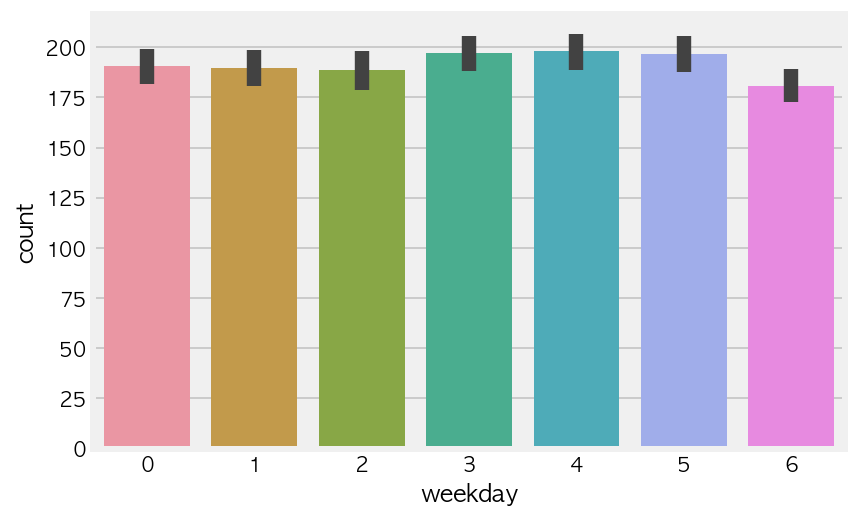

In [12]:
train['weekday'] = train['datetime'].dt.weekday

test['weekday'] = test['datetime'].dt.weekday

sns.barplot("weekday","count", data=train)

생각보다 월화수목금토일 차이가 많지 않다. 

## holiday & workingday

<AxesSubplot:xlabel='workingday', ylabel='count'>

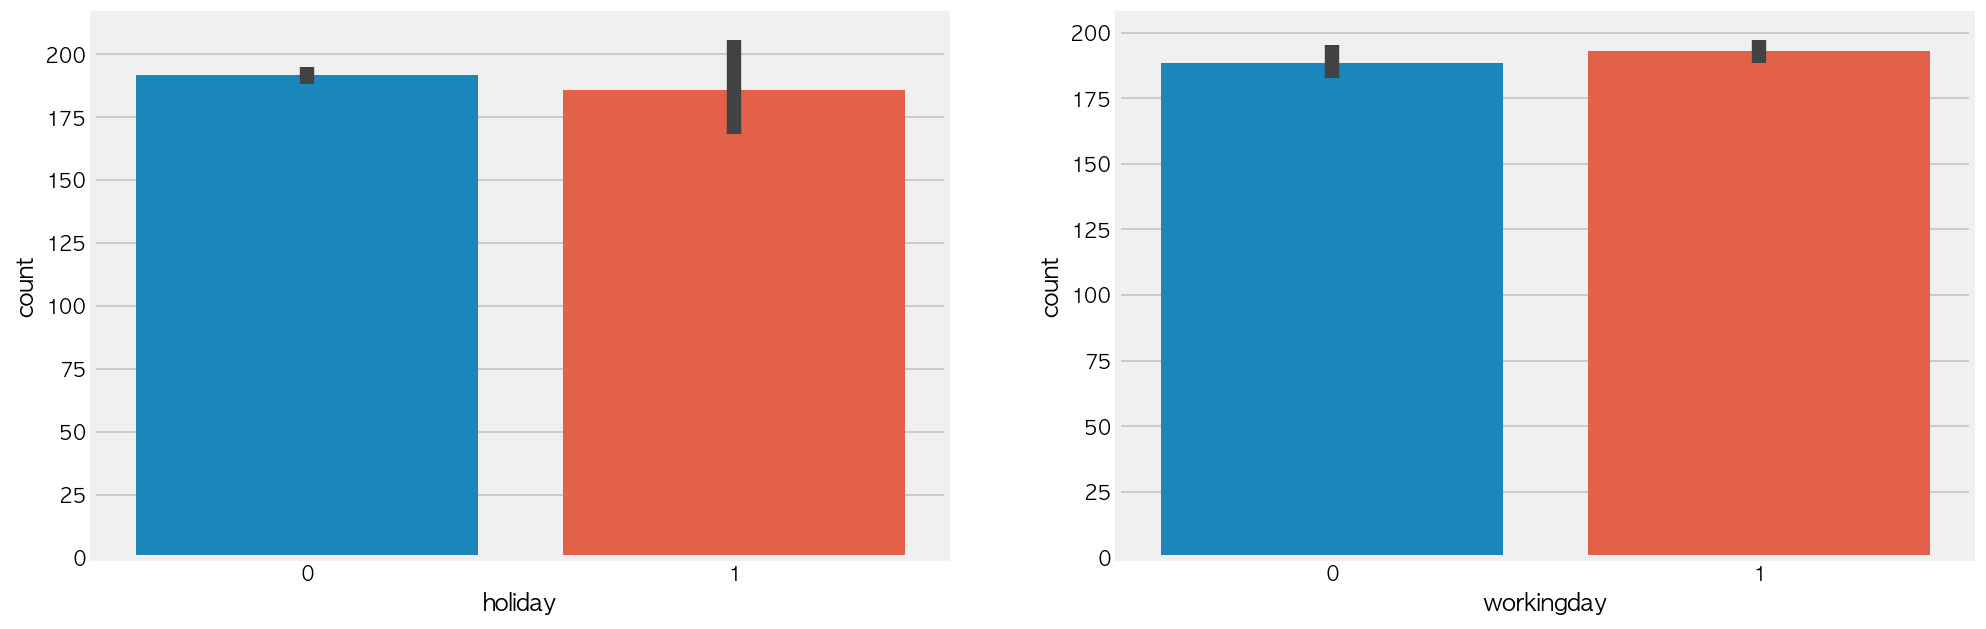

In [13]:
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot("holiday","count", data=train, ax = ax[0]) 
sns.barplot("workingday","count", data=train, ax = ax[1]) 

평균적으로 큰 차이가 없다.
workingday일 때가 조금 더 대여율이 높다.

<AxesSubplot:xlabel='hour', ylabel='count'>

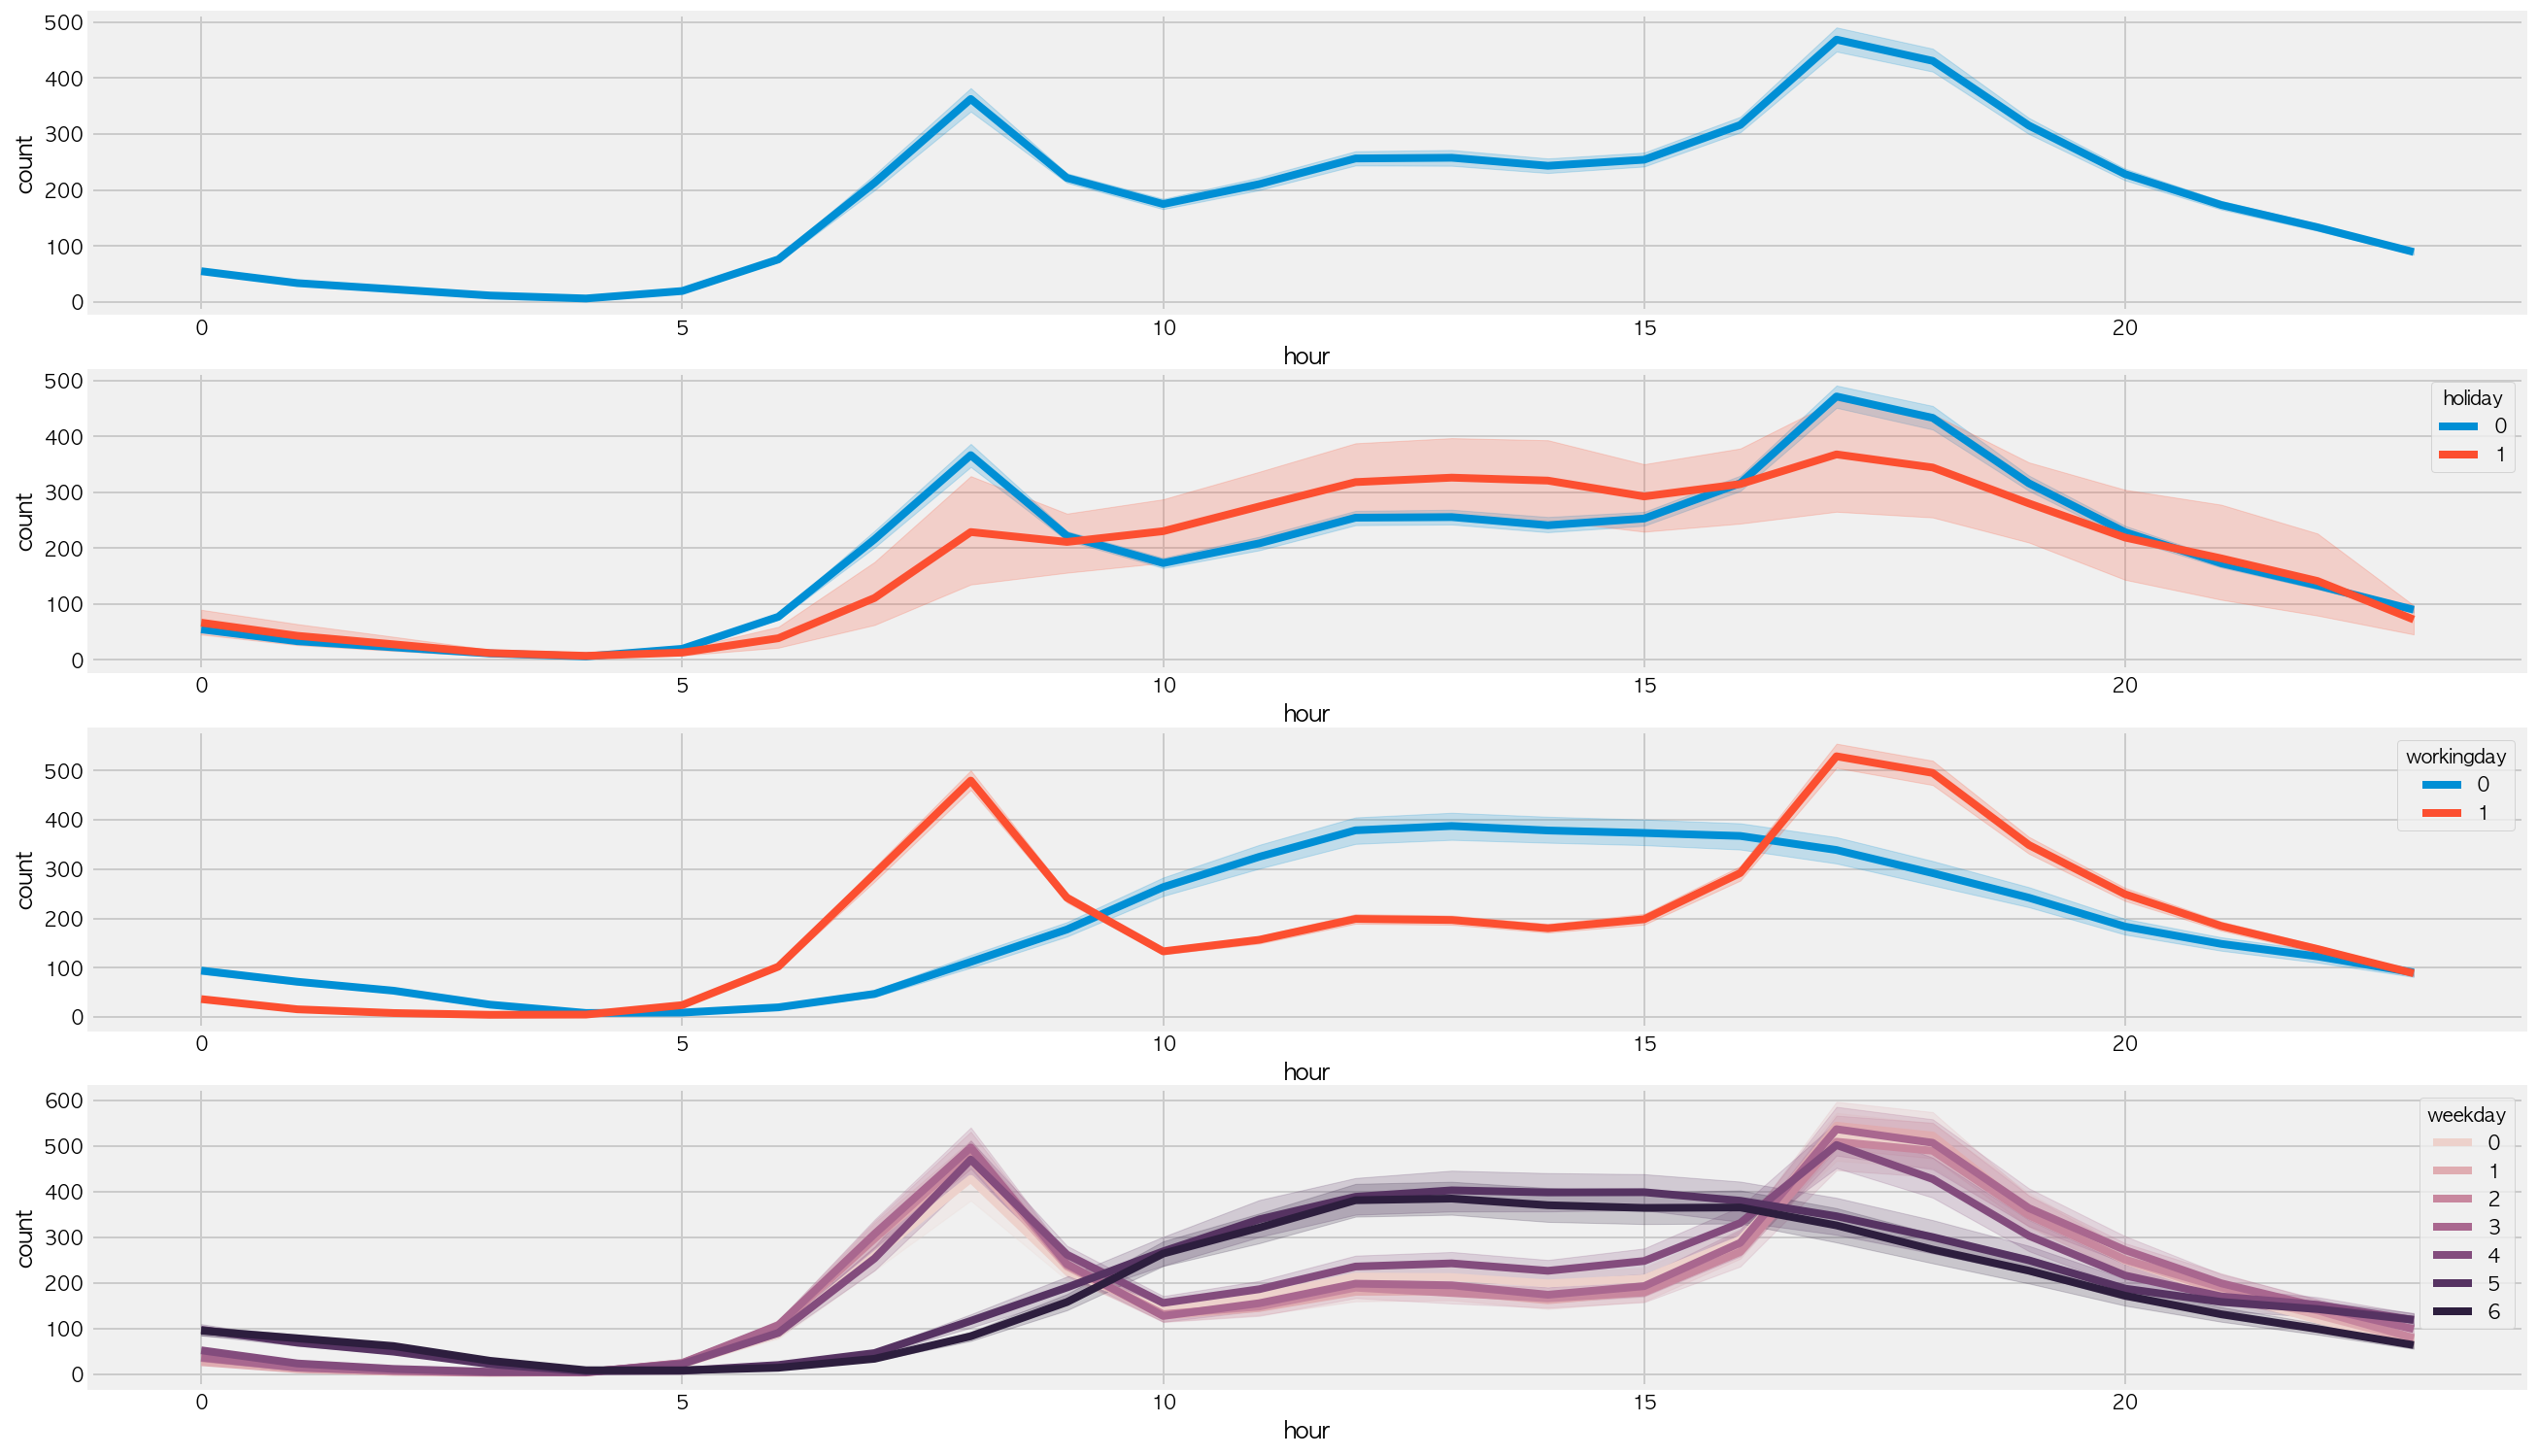

In [14]:
f, ax = plt.subplots(4,1, figsize=(20,13))

sns.lineplot("hour","count",data=train,ax = ax[0])
sns.lineplot("hour","count",hue = "holiday",data=train,ax = ax[1])
sns.lineplot("hour","count",hue = "workingday",data=train,ax = ax[2])
sns.lineplot("hour","count",hue = "weekday",data=train,ax = ax[3])

시간대 별 대여 수를 그려보았다.

확실히 workingday일 때 대여량을 보면 출퇴근 시간에 많이 대여된 것을 볼 수 있다.

weekday 그래프를 봐도 월~금 일 때에는 workingday랑, 토-일 일 때에는 holiday랑 비슷한 그래프가 나온 것을 볼 수 있다.

## 날씨 분석

**weather** -   
1: Clear, Few clouds, Partly cloudy, Partly cloudy   
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

**temp** - temperature in Celsius   

**atemp** - "feels like" temperature in Celsius   

**humidity** - relative humidity   

**windspeed** - wind speed

In [15]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

날씨 좋은 날이 가장 많다.

Text(0.5, 1.0, '날씨 별 대여량')

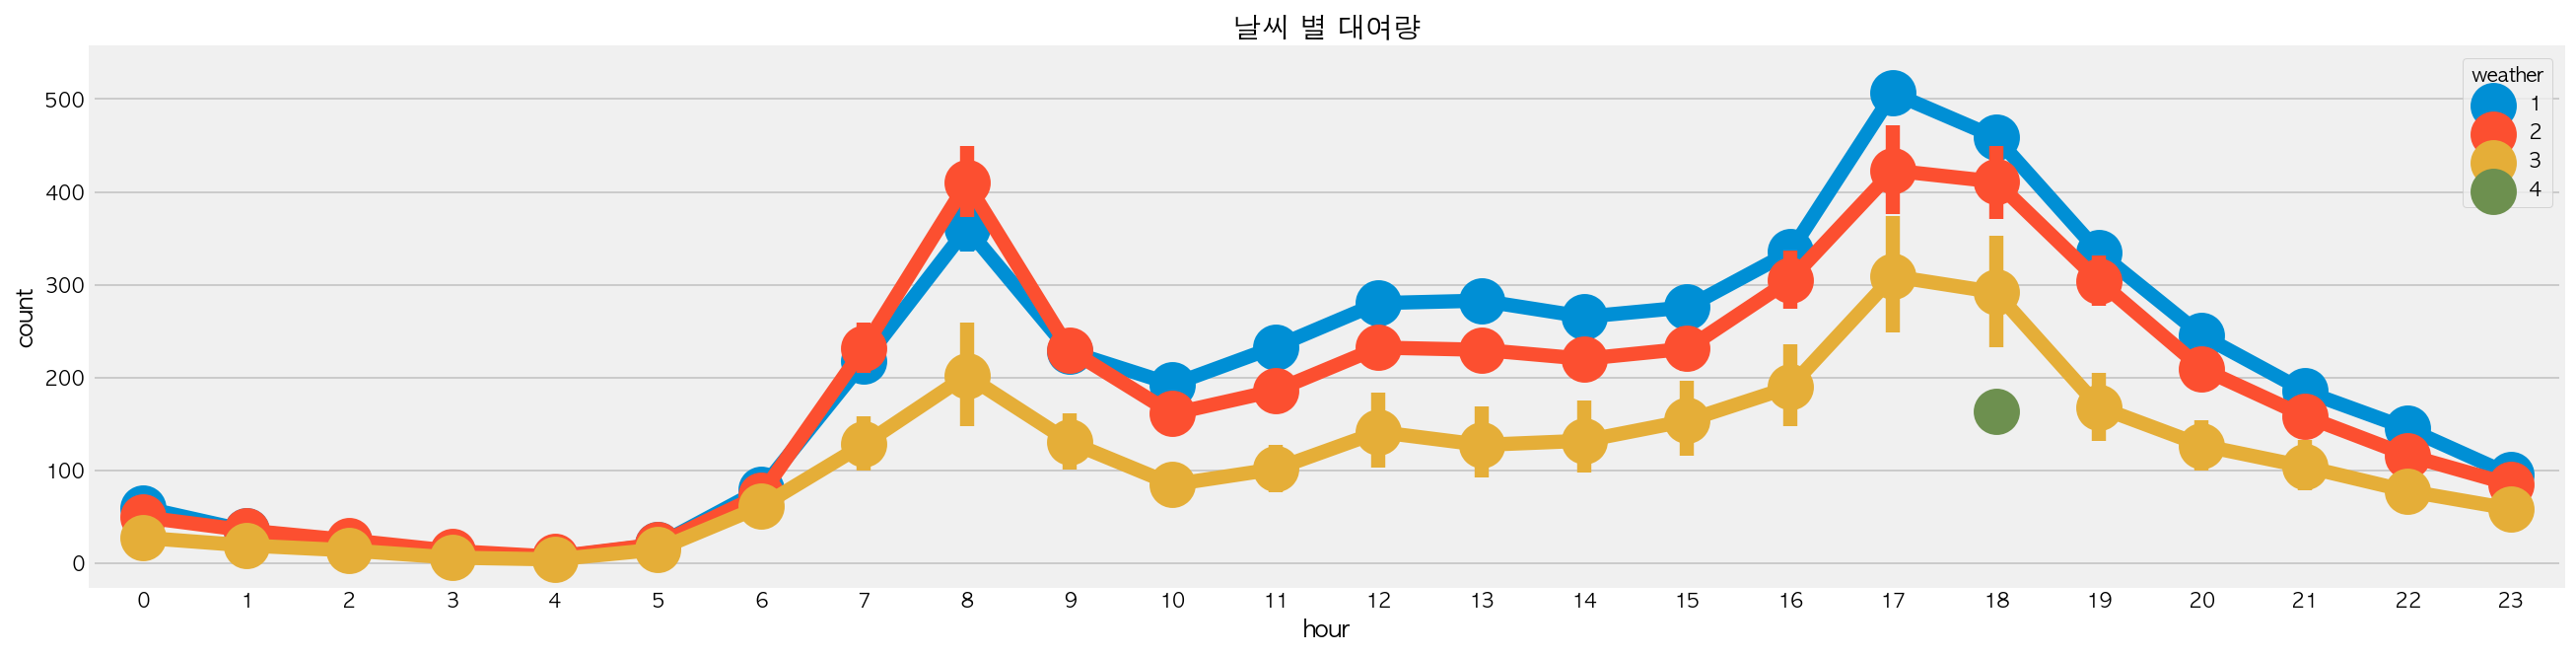

In [16]:
f, ax = plt.subplots(1,1, figsize=(20,5))

sns.pointplot("hour","count",hue = "weather",data=train, ax=ax)

ax.set_title('날씨 별 대여량')

날씨가 좋을 수록 대여량이 높은 것을 확인할 수 있다.

## temp 분석

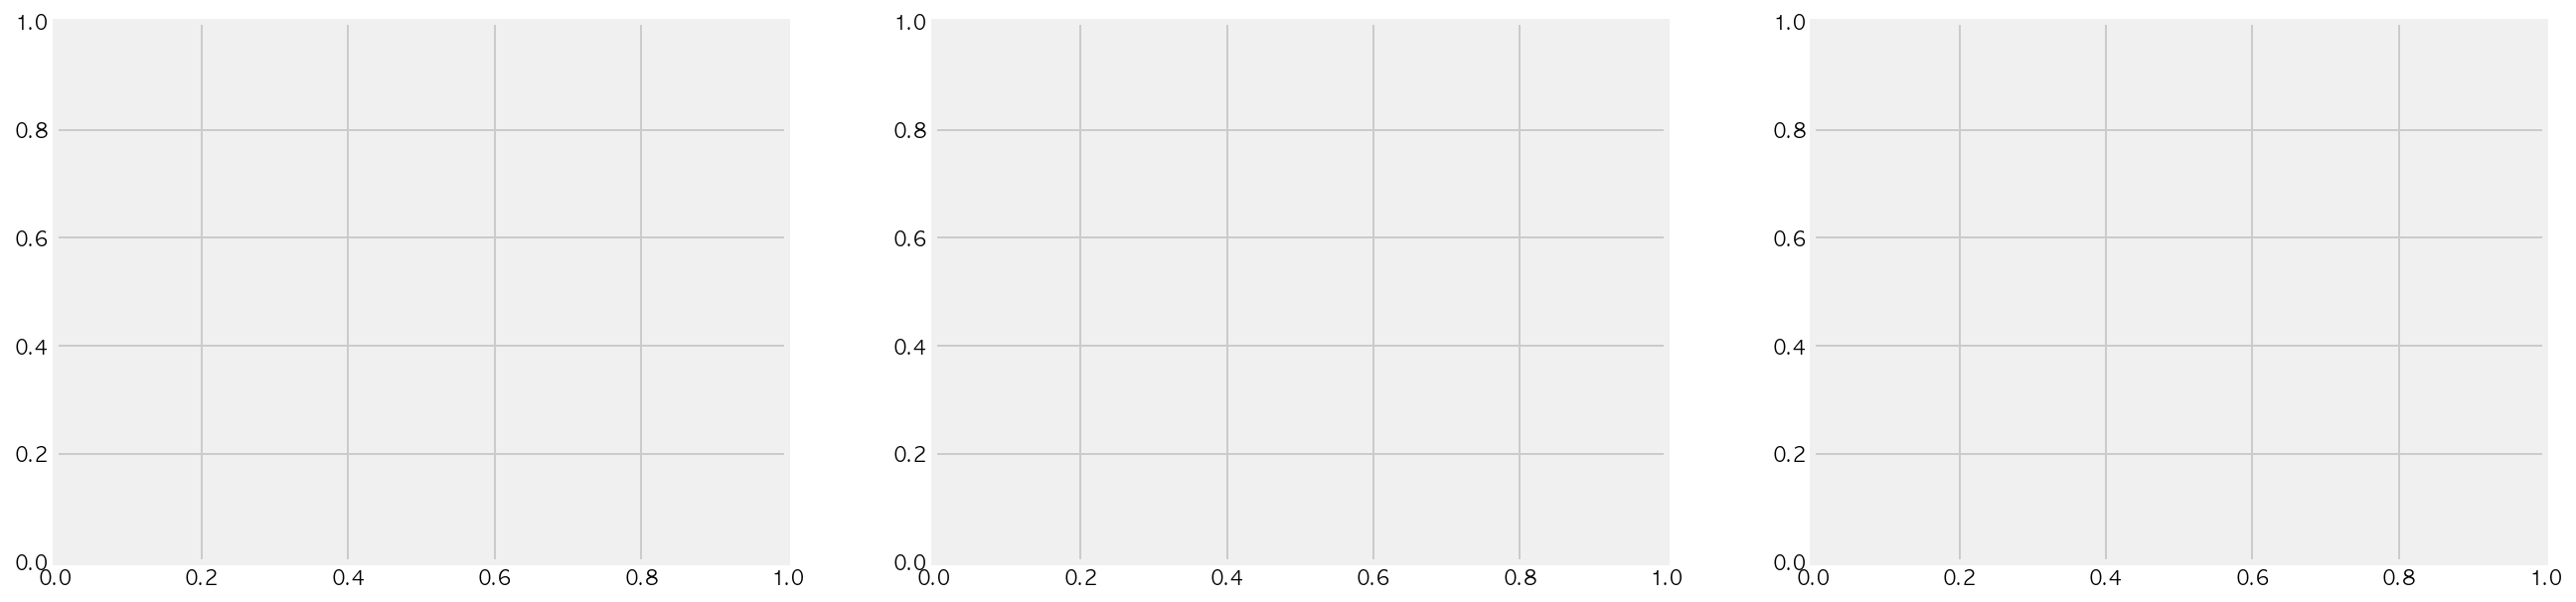

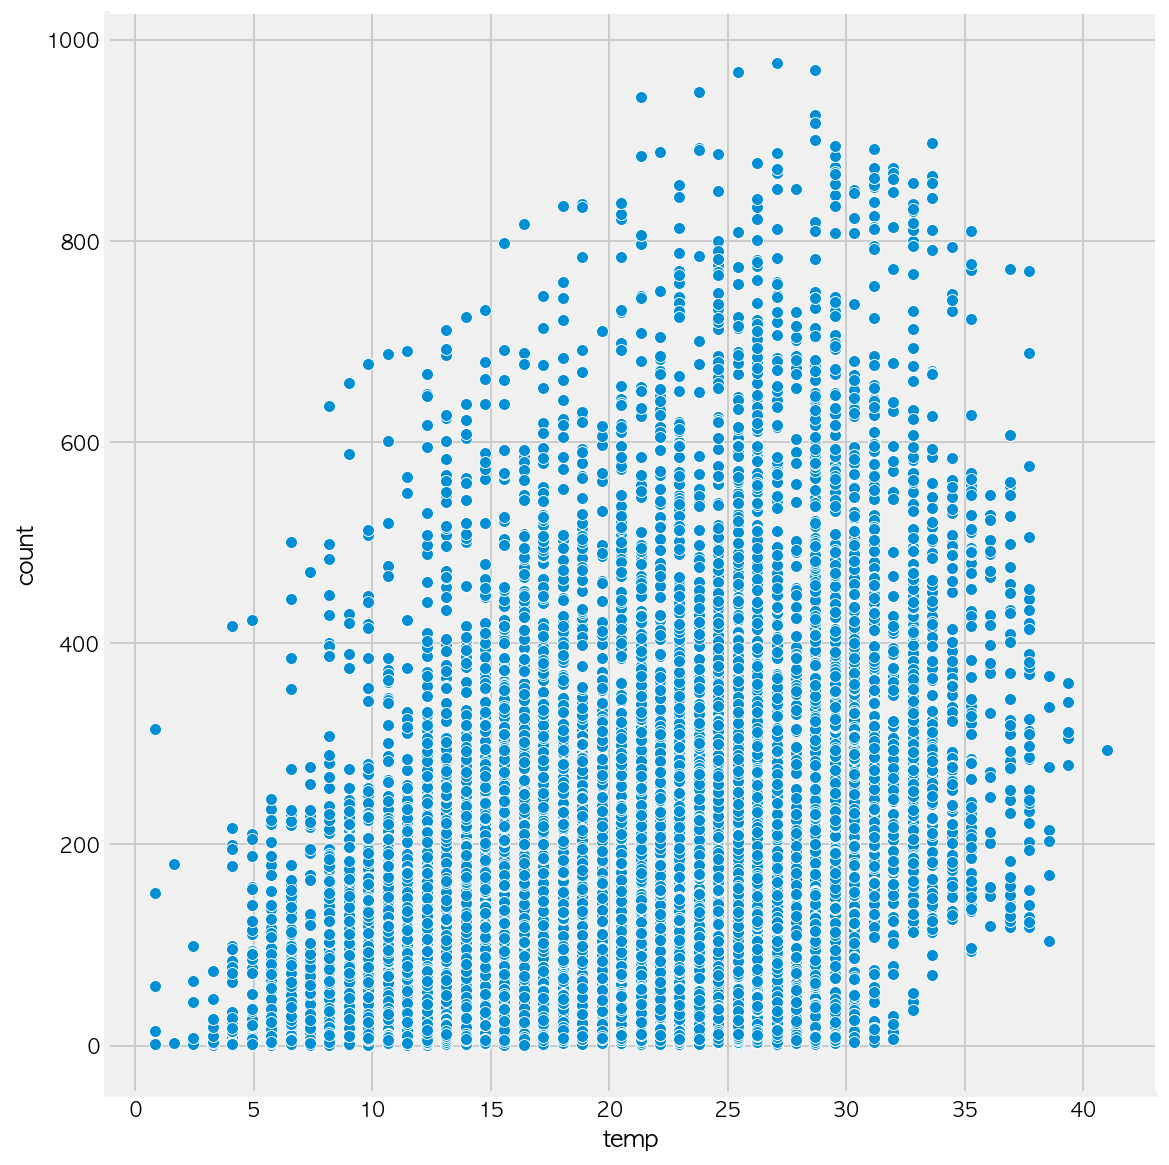

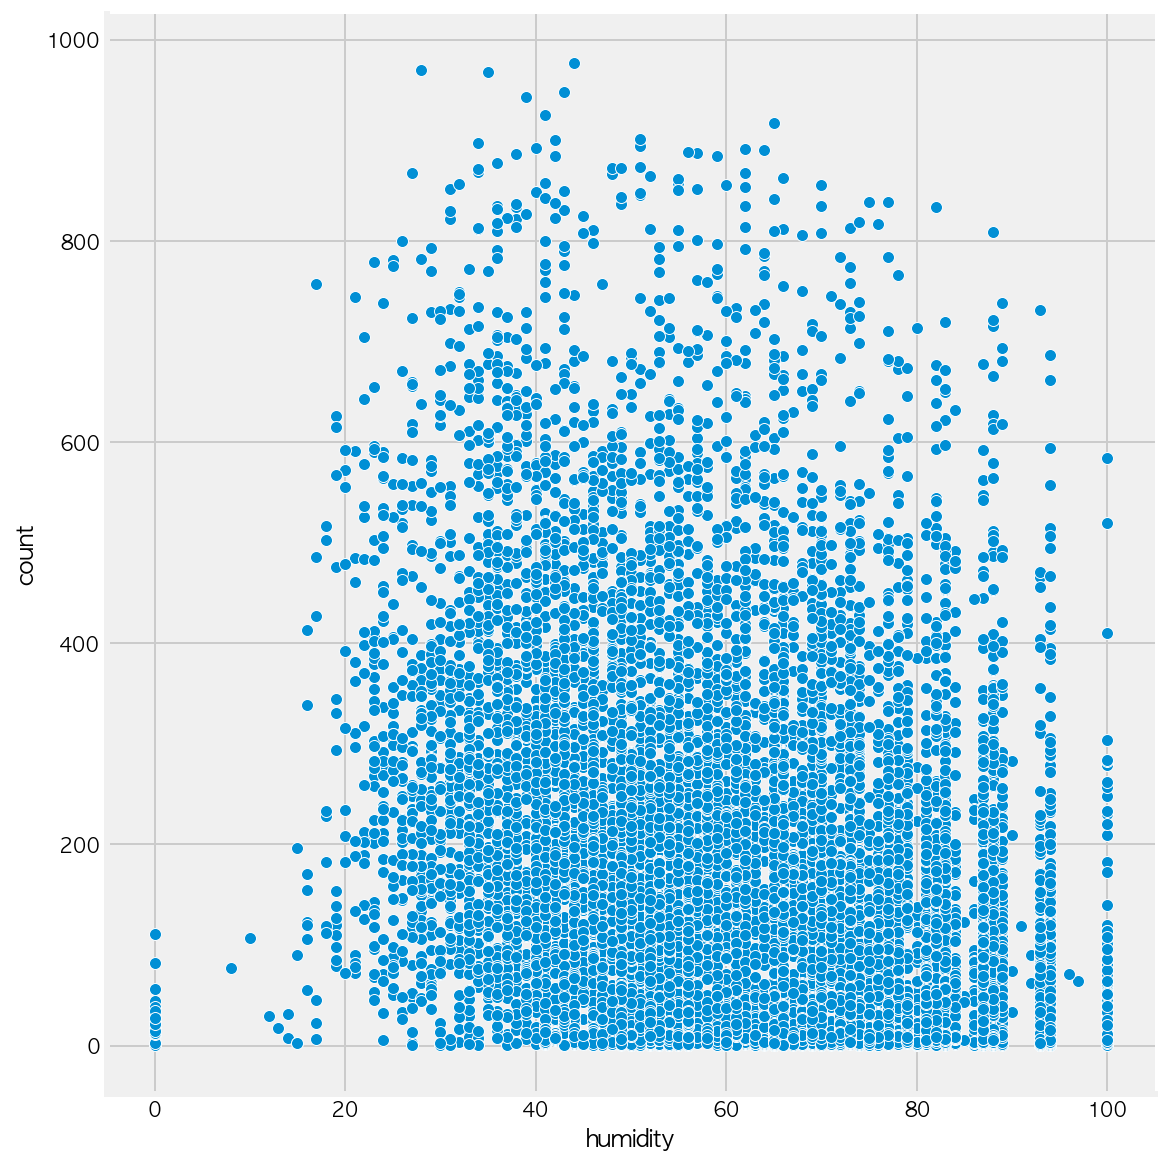

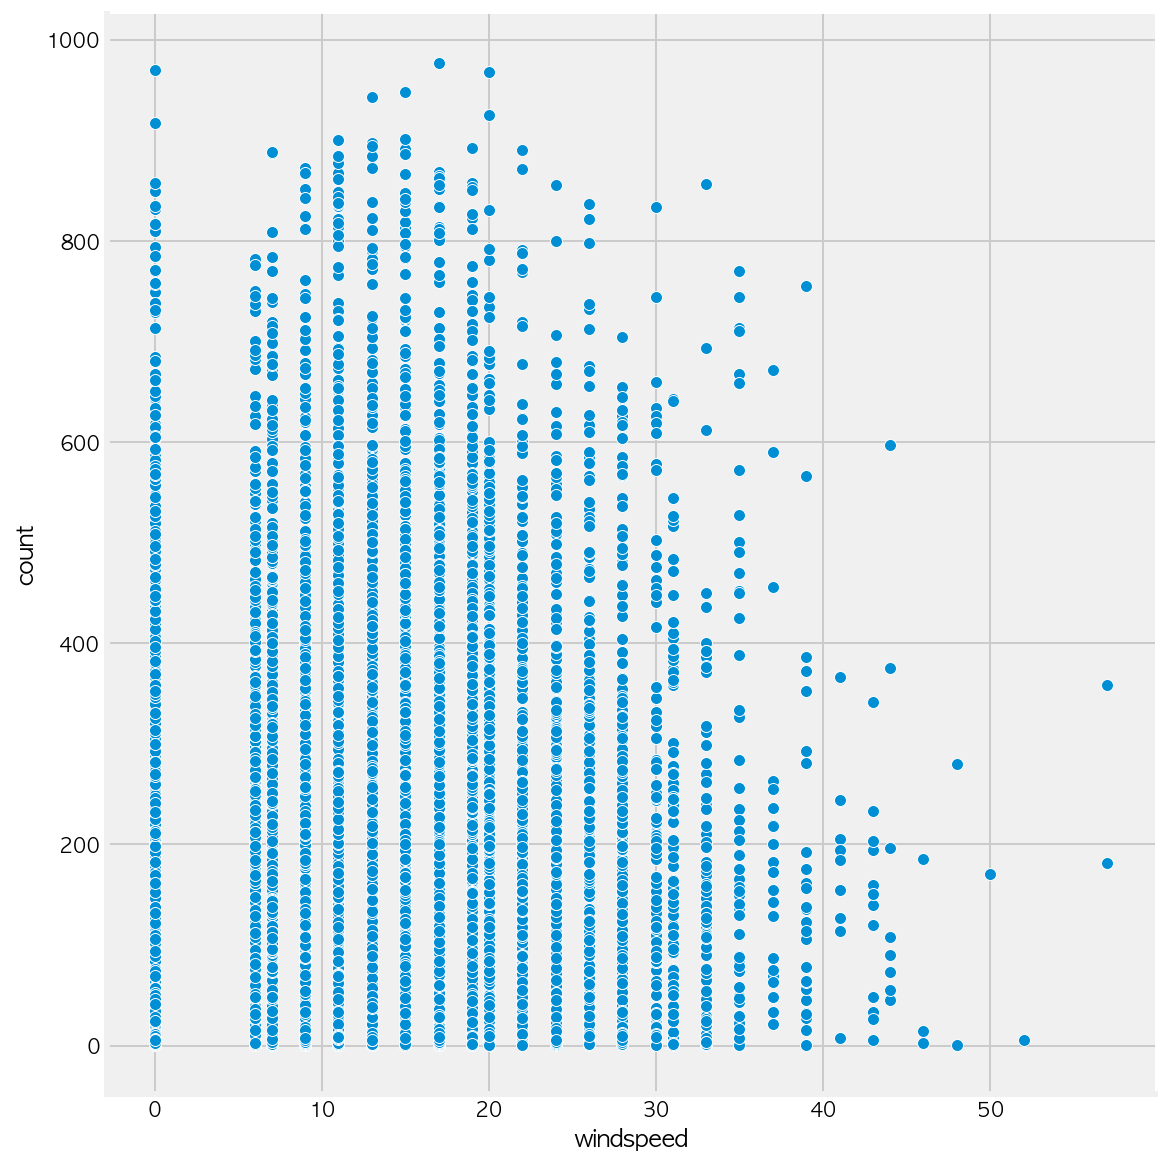

In [17]:
f, ax = plt.subplots(1,3, figsize=(20,5))

sns.relplot(x="temp", y="count", height=8, data=train, ax=ax[0])
sns.relplot(x="humidity", y="count", height=8, data=train, ax=ax[1])
sns.relplot(x="windspeed", y="count", height=8, data=train, ax=ax[2])

두 column간 상관관계를 보여준다.

습도랑 바람 세기가 이상한 값이 있는 것 같다.   
습도가 0이거나 100일 수가 있나?  
windspeed는 0과 6? 정도 되는값 사이가 비어있고 0에 많은 값이 있는 것으로 보아 뭔가 이상한 것 같다.


## IQR을 사용한 이상치(outlier) 파악

In [18]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [19]:
outlier_iqr(train,"temp")
print()
outlier_iqr(train,"humidity")
print()
outlier_iqr(train,"windspeed")

IQR은 12.299999999999999 이다.
lower bound 값은 -4.51 이다.
upper bound 값은 44.69 이다.
총 이상치 개수는 0 이다.

IQR은 30.0 이다.
lower bound 값은 2.0 이다.
upper bound 값은 122.0 이다.
총 이상치 개수는 22 이다.

IQR은 9.996400000000001 이다.
lower bound 값은 -7.993100000000002 이다.
upper bound 값은 31.992500000000003 이다.
총 이상치 개수는 227 이다.


이상치를 살펴보니 온도는 괜찮지만 humidity와 windspeed가 이상치가 발견되었다.

근데 windspeed의 bound값이 이상한 것 같다.   
이 값들은 어떻게 처리하지?

## 이상치를 처리하는 방법

- **지워버리기** : 날려야하는 데이터량이 많지 않으면 괜찮은 방법이지만 많으면 문제가 있을 수도 있다.
        
            만약 이상치가 특정한 조건에 의해 나타나는 이상치인 경우 날리면 모델의 정확도에 큰 영향을 미치게된다.
            
- **다른 값으로 대체하기** : 평균값이나 알고리즘을 사용해 예측값으로 채워넣는다.
                그런데 이게 정말 잘 맞을까?